## **Random Forest Regression**

<img src="https://miro.medium.com/max/1170/1*58f1CZ8M4il0OZYg2oRN4w.png">

## Introduction to Random Forests

Random Forest is a powerful machine learning algorithm that combines the strength of multiple decision trees to make predictions. Imagine a forest where each tree has a unique perspective on solving a problem. Random Forest works similarly by creating many decision trees and combining their opinions to make a final decision.

### How Random Forest Works:

1. **Multiple Trees**: It creates many decision trees, each trained on a random subset of the data.
2. **Random Features**: Each tree considers a random set of features when making decisions.
3. **Voting**: For predictions, all trees "vote," and the majority decision is taken.

### Key Advantages:

1. **Reduced Overfitting**: By using multiple trees, it's less likely to memorize the training data.
2. **Handling Complex Data**: It can handle many features and large datasets efficiently.
3. **Feature Importance**: It can tell you which features are most crucial for predictions.

## Applications of Random Forest

Random Forests are versatile and used in various fields:

1. **Finance**:
   - Predicting stock prices
   - Detecting fraudulent transactions

2. **Healthcare**:
   - Disease prediction and diagnosis
   - Analyzing medical images

3. **Environmental Science**:
   - Predicting weather patterns
   - Analyzing climate change effects

4. **E-commerce**:
   - Product recommendation systems
   - Customer churn prediction

5. **Marketing**:
   - Customer segmentation
   - Predicting campaign effectiveness



These applications showcase the algorithm's ability to handle complex, multi-dimensional data and provide accurate predictions across diverse fields.

## **Applications of Random Forest**


## **Get Started with Random Forest Regression**

In [1]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **Importing the Dataset**

Reading ().csv file

In [2]:
dataset = pd.read_csv("./Position_Salaries.csv")
print(dataset.head())
X = dataset["Level"].values
y = dataset["Salary"].values

X= np.array(X).reshape(-1,1)
y= np.array(y).reshape(-1,1)

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


## **Splitting the Dataset into the Training Set and Test Set**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## **Feature Scaling**

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

## **Training the Model**

In [5]:
modelRF = RandomForestRegressor(random_state = 0)
modelRF.fit(X,y)

/home/muzammil/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [11]:
dataset.Level
# dataset.Salary

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

## **Tree Visualization**

In [6]:
len(modelRF.estimators_)

100

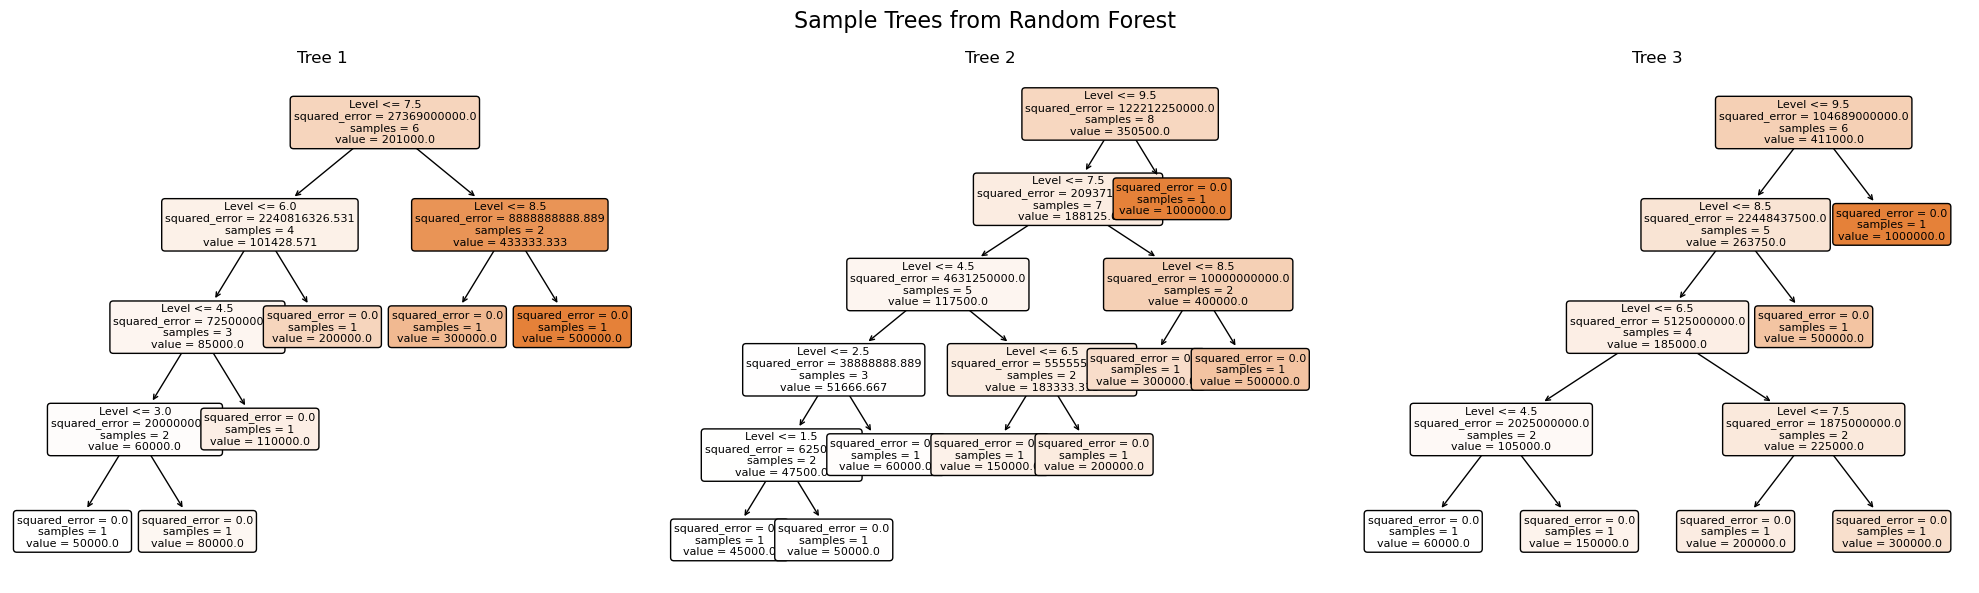

Number of trees in the forest: 100
Average depth of trees: 4.12
Average number of leaves: 6.52


In [7]:
## Improved Tree Visualization

import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np

# Select a few representative trees
n_trees_to_plot = 3
selected_trees = np.random.choice(modelRF.estimators_, n_trees_to_plot, replace=False)

fig, axes = plt.subplots(1, n_trees_to_plot, figsize=(20, 6))
fig.suptitle("Sample Trees from Random Forest", fontsize=16)

for i, t in enumerate(selected_trees):
    tree.plot_tree(t, 
                   feature_names=['Level'], 
                   filled=True, 
                   rounded=True, 
                   fontsize=8,
                   ax=axes[i])
    axes[i].set_title(f"Tree {i+1}")

plt.tight_layout()
plt.show()

# Feature Importance across all trees
importances = [tree.feature_importances_ for tree in modelRF.estimators_]
avg_importance = np.mean(importances, axis=0)


print(f"Number of trees in the forest: {len(modelRF.estimators_)}")
print(f"Average depth of trees: {np.mean([t.get_depth() for t in modelRF.estimators_]):.2f}")
print(f"Average number of leaves: {np.mean([t.get_n_leaves() for t in modelRF.estimators_]):.2f}")

## **Prediction**

In [11]:
y_pred = modelRF.predict([[11]])
y_pred

array([777000.])

## **Mean Squared Error**

In [9]:
from sklearn.metrics import mean_squared_error
import math

regression_model_mse = mean_squared_error(y_test,modelRF.predict(X_test))
print('Mean Squared Error:\t',math.sqrt(regression_model_mse))
print("R squared value\t\t",modelRF.score(X,y))

Mean Squared Error:	 319833.74196604086
R squared value		 0.9378393331453065


## **Visualization**

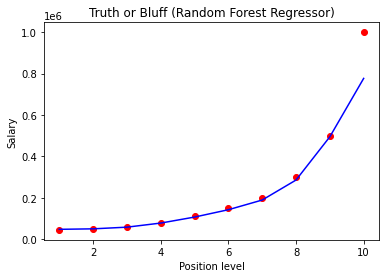

In [79]:
plt.scatter(X,y, color = 'red')
plt.plot(X, modelRF.predict(X), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regressor)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()